Задача: обучить модель, которая будет определять спам в сообщениях.

# Посмотрим на данные

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv')

In [ ]:
df['label'].unique()

10 - ham

01 - spam

100

010

001

1 2

1 2 3



```
# Выбран кодовый формат
```

one-hot encoding



In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


# Предобработка текстовых данных

Что нам нужно от предобработки?

*   Новый пункт
*   Новый пункт






1.   Оставить только буквы
2.   Перевести в нижний регистр
3.   Разделить на слова (токены)
4.   Привести слова к начальной форме



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
english_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
my_line = word_tokenize('He --coMes to Me!!! in Liverpool')

In [ ]:
my_line

['He', '--', 'coMes', 'to', 'Me', '!', '!', '!', 'in', 'Liverpool']

In [ ]:
'comes1'.isalpha()

False

In [ ]:
my_words = []
for word in my_line:
  if word.isalpha():
    w = word.lower()
    my_words.append(w)
my_words

['he', 'comes', 'to', 'me', 'in', 'liverpool']

In [ ]:
line_without_stopwords = [w for w in my_words if w not in english_stopwords]
line_without_stopwords

['comes', 'liverpool']

#Подходы к токенизации

1. Наивный подход: разделить строку по пробелам и почистить от знаков препинания (для задачи классификации).

2. Продвинутый подход: токенизация по словам из nltk

3. А кто сказал, что токен = слово?

In [ ]:
from transformers import AutoTokenizer

In [ ]:
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
bert_tokenizer.tokenize('He --coMes to Me!!! in Liverpool')

['he', '-', '-', 'comes', 'to', 'me', '!', '!', '!', 'in', 'liverpool']

In [ ]:
bert_tokenizer.tokenize('autodefenestration')

['auto', '##de', '##fen', '##estra', '##tion']

##Лемматизация и стемминг

Отличия: лемматизация - приводим к начальной форме, стемминг - оставляем только корень

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
processed_text = [lemmatizer.lemmatize(w) for w in line_without_stopwords]
processed_text

['come', 'liverpool']

In [ ]:
[lemmatizer.lemmatize(w) for w in ['gone', 'goes', 'children', 'news']]

['gone', 'go', 'child', 'news']

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer
words = ["game", "gaming", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала']

In [ ]:
# функция map
my_list = ['1', '2', '3']
list(map(int, my_list))

[1, 2, 3]

In [ ]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

In [ ]:
ss = SnowballStemmer(language='russian')
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа']

In [ ]:
def preprocess_text(st):
  x = word_tokenize(st)
  st = [w.lower() for w in x if w.isalpha()]
  st_stop = [w for w in st if w not in english_stopwords]
  st_lemmas = [lemmatizer.lemmatize(w) for w in st_stop]
  return ' '.join(st_lemmas)

In [ ]:
line = 'He --coMes to Me!!! in Liverpool'
preprocess_text(line)

'come liverpool'

In [ ]:
df['processed_text'] = df['text'].apply(preprocess_text)

KeyError: 'text'

In [ ]:
df.loc[10]['text']

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df.loc[10]['processed_text']

'gon na home soon want talk stuff anymore tonight k cried enough today'

# Простейшее представление текстовых данных: мешок слов

«Мешок слов» (Bag of words) — представление текста, которое описывает вхождение слова в документ. Данный метод включает только информацию о наличии слова в документе, однако любая информация о порядке слов в документе отбрасывается.

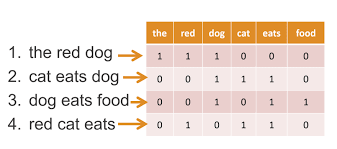

Простейшая интуитивная реализация для подсчета частоты встречаемости

In [ ]:
lines = ['the red dog', 'cat eats dog', 'dog eats food', 'red cat eats']
text = ' '.join(lines)
print(text)
dct = {}
for word in text.split():
  if word not in dct.keys():
    dct.update({word: 1})
  else:
    dct[word] += 1
print(dct)

the red dog cat eats dog dog eats food red cat eats
{'the': 1, 'red': 2, 'dog': 3, 'cat': 2, 'eats': 3, 'food': 1}


Либо проще

In [ ]:
from collections import Counter
Counter(text.split())

Counter({'the': 1, 'red': 2, 'dog': 3, 'cat': 2, 'eats': 3, 'food': 1})

И для мешка слов

In [ ]:
import numpy as np

In [ ]:
np.ones(8)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
overall = list(set(text.split()))
vector = np.zeros(len(overall))
for word in lines[0].split():
  vector[overall.index(word)] += 1

In [ ]:
overall

['dog', 'the', 'cat', 'food', 'red', 'eats']

In [ ]:
lines[0]

'the red dog'

In [ ]:
np.zeros(len(overall))

array([0., 0., 0., 0., 0., 0.])

In [ ]:
vector

array([1., 1., 0., 0., 1., 0.])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer creates a bag of words
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
cv = CountVectorizer()

Важный момент в обработке данных: разделение на тренировочную и тестовую выборки!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'])

In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
X_train[15]

'xxxmobilemovieclub use credit click wap link next txt message click http'

In [ ]:
cv.fit(X_train)

CountVectorizer()

In [ ]:
cv.vocabulary_

{'hi': 2220,
 'dude': 1443,
 'hw': 2341,
 'da': 1157,
 'realy': 3980,
 'mising': 3104,
 'today': 5069,
 'boy': 612,
 'whereare': 5521,
 'friendsare': 1882,
 'thekingshead': 4986,
 'come': 962,
 'canlove': 751,
 'dog': 1368,
 'must': 3219,
 'always': 165,
 'wait': 5413,
 'till': 5039,
 'end': 1534,
 'day': 1187,
 'word': 5602,
 'run': 4184,
 'time': 5041,
 'cell': 803,
 'already': 159,
 'pas': 3569,
 'dis': 1326,
 'ur': 5286,
 'contact': 1023,
 'see': 4287,
 'wat': 5450,
 'get': 1969,
 'red': 4015,
 'luv': 2905,
 'wid': 5538,
 'blue': 566,
 'put': 3896,
 'smile': 4516,
 'face': 1667,
 'purple': 3890,
 'hot': 2292,
 'pink': 3666,
 'swt': 4862,
 'orange': 3469,
 'thnk': 5007,
 'lyk': 2915,
 'green': 2070,
 'wana': 5431,
 'go': 2005,
 'yelow': 5682,
 'wnt': 5584,
 'bck': 450,
 'black': 539,
 'jealous': 2541,
 'brown': 661,
 'miss': 3105,
 'nw': 3383,
 'plz': 3704,
 'giv': 1989,
 'one': 3441,
 'color': 957,
 'yet': 5690,
 'ya': 5664,
 'sapna': 4221,
 'aunty': 353,
 'manege': 2970,
 'hogidhe

Посмотрим, сколько слов в нашем словаре.

In [ ]:
len(cv.vocabulary_.keys())

5736

In [ ]:
X_train = cv.transform(X_train)

In [ ]:
X_train[15]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 5736)>

Обучим модель

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test = cv.transform(X_test)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred[:10]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham'], dtype=object)

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
y_test[:10]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham'], dtype=object)

Посчитаем метрики

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9798994974874372

In [ ]:
recall_score(y_test, y_pred, pos_label='spam')

0.8594594594594595

# Практикум

Задание 1. Напишите "универсальную" функцию для предобработки текста. На вход функция получает строку и параметры для предобработки: punct=True или False (соответственно, сохранить знаки пунктуации в отдельных токенах или убрать их вообще), process='lemma', 'stem' или 'none' (лемматизировать слова, провести стемминг или оставить всё как было).

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(line, punct=False, process='none'):
    tokens = word_tokenize(line)
    new_tokens = []

    for w in tokens:
        if punct:
            new_tokens.append(w.lower())
        else:
            if w.isalpha():
                new_tokens.append(w.lower())

    filtered = [w for w in new_tokens if w not in stop_words]

    if process == 'lemma':
        processed = [lemmatizer.lemmatize(w) for w in filtered]
    elif process == 'stem':
        processed = [stemmer.stem(w) for w in filtered]
    else:
        processed = filtered

    return ' '.join(processed)

example = "He --coMes to Me!!! in Liverpool"
print(preprocess_text(example, punct=False, process='lemma'))
print(preprocess_text(example, punct=True, process='stem'))
print(preprocess_text(example, punct=False, process='none'))

come liverpool
-- come ! ! ! liverpool
comes liverpool


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Задание 2. С помощью написанной в задании 1 функции предобработайте датасет как минимум тремя разными способами (на ваше усмотрение). Далее создайте мешки слов с предобработанными текстами и обучите на них три классификатора. Подсчитайте accuracy и recall для каждого класса. Результаты соберите в таблицу pd.DataFrame и выведите её на экран.

In [ ]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

print(df.head())
print(df['label'].value_counts())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
df['text_lemma'] = df['text'].apply(lambda x: preprocess_text(x, punct=False, process='lemma'))
df['text_stem'] = df['text'].apply(lambda x: preprocess_text(x, punct=False, process='stem'))
df['text_raw'] = df['text'].apply(lambda x: preprocess_text(x, punct=False, process='none'))

df[['text', 'text_lemma', 'text_stem', 'text_raw']].head(3)


,text,text_lemma,text_stem,text_raw
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...,free entri wkli comp win fa cup final tkt may ...,free entry wkly comp win fa cup final tkts may...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

def train_and_eval(text_column):
    X_train, X_test, y_train, y_test = train_test_split(df[text_column], df['label'], test_size=0.2, random_state=42)

    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    rec_spam = recall_score(y_test, y_pred, pos_label='spam')
    rec_ham = recall_score(y_test, y_pred, pos_label='ham')

    return acc, rec_spam, rec_ham

results = {
    'lemma': train_and_eval('text_lemma'),
    'stem': train_and_eval('text_stem'),
    'raw': train_and_eval('text_raw')
}

In [ ]:
results_df = pd.DataFrame(results, index=['Accuracy', 'Recall (spam)', 'Recall (ham)']).T
print(results_df)

       Accuracy  Recall (spam)  Recall (ham)
lemma  0.976682       0.826667           1.0
stem   0.976682       0.826667           1.0
raw    0.975785       0.820000           1.0
